# Machine Problem #2

## Imports Here

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import linalg
import math
import wave
from scipy.io import wavfile
from sklearn.decomposition import PCA
from scipy import signal
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from functools import partial
import scipy.stats as stats

## Data Extraction and Feature Extraction

In [2]:
features= defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
peeps=['dg', 'ls', 'mh', 'yx']
peeps_id=['dg', 'ls', 'yx']
words=['asr', 'cnn', 'dnn', 'hmm', 'tts']

for p in range(len(peeps)):
    for w in range(len(words)):
        for i in range(1, 6):
            file_mat=[]
            file_data=open(('feature/'+peeps[p]+'/'+peeps[p]+'_'+words[w]+str(i)+'.fea'), encoding = "ISO-8859-1").read().strip().split('\n')
            file_mat = np.array([np.float_(line.split(',')) for line in file_data])
            features[peeps[p]][words[w]][i]=file_mat

## Getting PCA Features

In [3]:
# def pca_reduce(signal, n_components, block_size):
    
#     # First, zero-pad the signal so that it is divisible by the block_size
#     samples = len(signal)
#     hanging = block_size - np.mod(samples, block_size)
#     padded = np.lib.pad(signal, (0, hanging), 'constant', constant_values=0)
    
#     # Reshape the signal to have 1024 dimensions
#     reshaped = padded.reshape((len(padded) // block_size, block_size))
    
#     # Second, do the actual PCA process
#     pca = PCA(n_components=n_components)
#     pca.fit(reshaped)
    
#     comps = pca.components_
#     transformed = pca.transform(reshaped)
#     reconstructed = pca.inverse_transform(transformed).reshape((len(padded)))
#     return pca, comps, reconstructed

#### PCA on Raw Data (fft)

In [4]:
# data= {}
# fs={}
# peeps=['dg', 'ls', 'mh', 'yx']
# words=['asr', 'cnn', 'dnn', 'hmm', 'tts']
# features= defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))

# for x in range(len(peeps)):
#     p=peeps[x]
#     for y in range(len(words)):
#         w=words[y]
#         for i in range(1, 6):
#             wav_r=wave.open('data/'+p+'/'+p+'_'+w+str(i)+'.wav', 'rb')
#             fs[p, w, i], x = wavfile.read('data/'+p+'/'+p+'_'+w+str(i)+'.wav')
#             if wav_r.getnchannels()==2:
#                 data[p, w, i]=x[:, 0]
#                 #print(x[:,0],'\nasasas\n')
#                 _, comps, reconstructed = pca_reduce(np.fft.fft(x[:, 0], 1024).real, 8, 103)
#             else:
#                 data[p, w, i]=x
#                 _, comps, reconstructed = pca_reduce(np.fft.fft(x, 1024).real, 8, 103)
#             features[p][w][i]=comps
        

#### PCA on MFCC

In [5]:
features= defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
peeps=['dg', 'ls', 'mh', 'yx']
words=['asr', 'cnn', 'dnn', 'hmm', 'tts']

for p in range(len(peeps)):
    for w in range(len(words)):
        for i in range(1, 6):
            file_mat=[]
            file_data=open(('feature/'+peeps[p]+'/'+peeps[p]+'_'+words[w]+str(i)+'.fea'), encoding = "ISO-8859-1").read().strip().split('\n')
            file_mat = np.array([np.float_(line.split(',')) for line in file_data])
            features[peeps[p]][words[w]][i]=file_mat

### Speaker Independent

In [20]:
dw_d=[]
for x in range(len(words)):
    w=words[x]
    pw=[]
    for y in range(len(peeps)):
        p=peeps[y]
        for i in range(1, 5):
            pw.extend(features[p][w][i])
    dw_d.append(pw)
    
comps_d=[0]*len(words)
for i in range(len(words)):
        pca = PCA(n_components=14)
        pca.fit(dw_d[i])
        comps_d[i]=pca.components_

pca_train_sp_dependent=defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
pca_test_sp_dependent=defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
pca_data_per_word_d=[]
pca_dw_d=[]
for x in range(len(words)):
    w=words[x]
    per_word=[]
    pw=[]
    for y in range(len(peeps)):
        p=peeps[y]
        for i in range(1, 5):
            pca_train_sp_dependent[p][w][i]=features[p][w][i]@comps_d[i-1].T
            per_word.append(features[p][w][i]@comps_d[i-1].T)
            pw.extend(features[p][w][i]@comps_d[i-1].T)
    pca_data_per_word_d.append(per_word)
    pca_dw_d.append(pw)
        
pca_test_word_d=[]
pca_true_labels_d = []
for x in range(len(words)):
    w=words[x]
    per_word=[]
    for j in range(len(peeps)):
        p=peeps[j]
        for i in range(5, 6):
            pca_test_sp_dependent[p][w][i]=features[p][w][i]@comps_d[i-1].T
            per_word.append(np.array(features[p][w][i])@comps_d[i-1].T)
            #print(w)
            pca_true_labels_d.append(w)
    pca_test_word_d.append(per_word)
        

### Speaker Dependent

In [7]:
# dw_id=[]
# for x in range(len(words)):
#     w=words[x]
#     pw=[]
#     for y in range(len(peeps_id)):
#         p=peeps_id[y]
#         for i in range(1, 6):
#             pw.extend(features[p][w][i])
#     dw_id.append(pw)
    
# comps_id=[0]*len(words)
# for i in range(len(words)):
#         pca = PCA(n_components=14)
#         pca.fit(dw_id[i])
#         comps_id[i]=pca.components_
        
# pca_train_sp_independent=defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
# pca_test_sp_independent=defaultdict(lambda: defaultdict(lambda: defaultdict(partial(np.ndarray, 0))))
# pca_data_per_word_id=[]
# pca_dw_id=[]

# for x in range(len(words)):
#     w=words[x]
#     per_word=[]
#     pw=[]
#     for y in range(len(peeps_id)):
#         p=peeps_id[y]
#         for i in range(1, 6):
#             pca_train_sp_independent[p][w][i]=features[p][w][i]@comps_id[i-1].T
#             per_word.append(features[p][w][i]@comps_id[i-1].T)
#             pw.extend(features[p][w][i]@comps_id[i-1].T)
#     pca_data_per_word_id.append(per_word)
#     pca_dw_id.append(pw)
        
# pca_test_word_id=[]
# pca_true_labels_id = []
# for x in range(len(words)):
#     w=words[x]
#     per_word=[]
#     for j in range(len(peeps_id)):
#         p=peeps[j]
#         for i in range(1, 6):
#             pca_test_sp_independent[p][w][i]=features[p][w][i]@comps_id[i-1].T
#             per_word.append(np.array(features[p][w][i])@comps_id[i-1].T)
#             #print(w)
#             pca_true_labels_id.append(w)
#     pca_test_word_id.append(per_word)

## Self Recorded Samples: Test Feature Extraction 

In [8]:
words=['asr', 'cnn', 'dnn', 'hmm', 'tts']
self_features=defaultdict(lambda: defaultdict(partial(np.ndarray, 0)))
test_self=[]=defaultdict(lambda: defaultdict(partial(np.ndarray, 0)))

for w in words:
    for i in range(1, 6):
        self_features[w][i] = open(('Self-Recorded/Self Features/ak_'+w+str(i)+'.txt'), encoding = "ISO-8859-1").read().split('\n')

## HMM Parameters: $\pi$, A, B (Speaker Dependent)

In [9]:
# #Create B below:
# pca_means_per_word_id=[]
# for x in range(len(words)):
#     w=words[x]
#     temp_mean=[]
#     for y in range(len(peeps_id)):
#         p=peeps_id[y]
#         for i in range(1, 6):
#             if len(pca_train_sp_independent[p][w][i]) != 0:
#                 temp_mean.append(np.mean(pca_train_sp_independent[p][w][i], axis=0))
#                 #print(temp_mean)
#     pca_means_per_word_id.append(np.mean(temp_mean, axis=0))

# pca_cov_per_word_id=[]  
# for i in range(len(words)):
#     pca_cov_per_word_id.append(np.cov(np.array(pca_dw_id[i]).T))
    
# # cov_per_word_id=[]
# # for x in range(len(words)):
# #     w=words[x]
# #     for y in range(len(peeps_id)):
# #         p=peeps_id[y]
# #         for i in range(1, 5):
# #             if len(train_sp_independent[p][w][i]) != 0:
# #                 temp_cov.extend(train_sp_independent[p][w][i].T)
# #     print(np.cov(temp_cov))
# #     cov_per_word_id.append(np.cov(temp_cov))
# # # #Initializing b_j(x):
# # for i in range(0, 5):
# #     for j in range (0, 15):
# #         gauss[i][j] = stats.multivariate_normal(mean=means_per_word_id[i], cov=cov_per_word_id[i]).pdf(data_per_word_id[i][j])

## HMM Parameters: $\pi$, A, B (Speaker Independent)

In [21]:
#Create B below:
pca_means_per_word_d=[]
for x in range(len(words)):
    w=words[x]
    temp_mean = []
    for y in range(len(peeps)):
        p=peeps[y]
        for i in range(1, 5):
            if len(pca_train_sp_dependent[p][w][i]) != 0:
                temp_mean.append(np.mean(pca_train_sp_dependent[p][w][i], axis=0))
                #print(temp_mean)
    pca_means_per_word_d.append(np.mean(temp_mean, axis=0))

pca_cov_per_word_d=[]
for i in range(len(words)):
    pca_cov_per_word_d.append(np.cov(np.array(pca_dw_d[i]).T))
    
# cov_per_word_d=[]
# for x in range(len(words)):
#     w=words[x]
#     temp_cov = []
#     for y in range(len(peeps)):
#         p=peeps[y]
#         for i in range(1, 5):
#             if len(train_sp_dependent[p][w][i]) != 0:
#                 temp_cov.append(np.cov(train_sp_dependent[p][w][i].T))
#     cov_per_word_d.append(np.mean(temp_cov, axis=0))
# # #Initializing b_j(x):
# for i in range(0, 5):
#     for j in range (0, 15):
#         gauss[i][j] = stats.multivariate_normal(mean=means_per_word_id[i], cov=cov_per_word_id[i]).pdf(data_per_word_id[i][j])

## Defining GaussianHMM Model

In [22]:
class GHMM:
    def __init__(self, mean, cov):
        states = [0,1,2,3,4]
        self.N = len(states)
        self.Sigma=[cov+0.5*np.identity(len(cov))]*self.N
        self.mu=[mean]*self.N
        
        self.pi= [1/5, 1/5, 1/5, 1/5, 1/5] #Initial Probabilty Vector
        self.A = [[0.8, 0.2, 0, 0, 0],
             [0, 0.8, 0.2, 0, 0],
             [0, 0, 0.8, 0.2, 0],   #Transition Probabilty Matrix
             [0, 0, 0, 0.8, 0.2],
             [0, 0, 0, 0, 1]]
    
    def train(self, X):
        gamma, xi=self.E_step(X)
        self.M_step(X, gamma, xi)
    
    def get_B(self, file): 
#         print("file: \n")
#         print(file)
#         print('----------')
        T=len(file)
        B=np.zeros((self.N,T))
        for i in range(0,self.N):
            for t in range(0,T):
#                 print('m: \n')
#                 print(self.mu[i])
#                 print("\nS: \n")
#                 print(self.Sigma[i])
#                 print('\n----------------\n')
#                 print('X: \n')
#                 print(file[t])
#                 print('\n-----------------------------------------\n')
                B[i,t]=stats.multivariate_normal(self.mu[i], self.Sigma[i]).pdf(file[t])
#                 print("B: \n")
#                 print(B[i][t])
#                 print('----------')
                #B[i,t]=stats.multivariate_normal(np.mean(file, axis=0)[i], np.cov(file.T)[i]).pdf(file[t])
#         print("Bin: \n")
#         print(B)
#         print('----------')
        return B
    
    def E_step(self, X):
        N=self.N
        L=len(X)
        maxTsteps=max(len(xdata) for xdata in X)
        Amat = np.array(self.A)
        
        gamma=np.zeros((N, maxTsteps, L))
        xi=np.zeros((N, N, maxTsteps, L))
        
        for inum, f in enumerate(X):
            B=self.get_B(f)
            T=len(f)
            tildealpha=np.zeros((N,T))
            tildebeta=np.zeros((N,T))
            log_g = np.zeros((T))
            baralpha = np.zeros((N,T))


            for i in range(0,N):
                baralpha[i,0]=self.pi[i]*B[i,0]
            log_g[0] = np.log(np.sum(baralpha[:,0]))
            tildealpha[:,0]=baralpha[:,0]/np.exp(log_g[0])

            for t in range(1,T):
                for i in range(0,N):
#                     print('B:\n')
#                     print(B[i,t])
#                     print('\n tAlpha:\n')
#                     print(tildealpha[:,t-1])
#                     print('\n A:\n')
#                     print(Amat[:,i])
#                     print('\n t-B: \n')
#                     print(tildebeta[:,t+1]*B[:,t+1])
#                     print('\n inner: \n')
#                     print(np.inner(tildealpha[:,t-1],Amat[:,i]))
#                     print('\n balpha: \n')
#                     print(B[i,t]*np.inner(tildealpha[:,t-1],Amat[:,i]))
#                     print('\n----------------------------------------------\n')
                    baralpha[i,t]=B[i,t]*np.inner(tildealpha[:,t-1],Amat[:,i])
                log_g[t] = np.log(np.sum(baralpha[:,t]))
                tildealpha[:,t]=baralpha[:,t]/np.exp(log_g[t])

            for i in range(0,N):
                tildebeta[i,T-1] = 1/np.exp(log_g[T-1])

            for t in range(T-2,-1,-1):
                for i in range(0,N):
                    tildebeta[i,t]=np.inner(Amat[i,0:N],tildebeta[:,t+1]*B[:,t+1])/np.exp(log_g[t+1])

            for t in range(0,T):
                gamma[:,t, inum] = tildealpha[:,t]*tildebeta[:,t]
                gamma[:,t, inum] = gamma[:,t, inum]/np.sum(gamma[:,t, inum])
    
            for t in range(0,T):
                for i in range(0,N):
                    for j in range(0,N):
                        xi[i,j,t,inum]=tildealpha[i,t]*Amat[i,j]
                        if (t<T-1):
                            if j==N:
                                xi[i,j,t,inum]=0
                            else:
                                xi[i,j,t,inum] = xi[i,j,t,inum]*B[j,t+1]*tildebeta[j,t+1]
                xi[:,:,t,inum]=xi[:,:,t,inum]/np.sum(xi[:,:,t,inum])
                
        return gamma, xi
    
    def M_step(self, X, gamma, xi):
        N=self.N
        L=len(X)
        
        for i in range(0,N):
            for j in range(0,N):
                self.A[i][j]=np.sum(xi[i,j,:])/np.sum(gamma[i,:])
                
        for i in range(0,N):
            self.mu[i]=0
            for l in range(L):
                for t in range(len(X[l])):
                    self.mu[i]+=X[l][t]*gamma[i, t, l]
            self.mu[i]/=np.sum(gamma[i])
            
        for i in range(0,N):
            self.Sigma[i]=0.5*np.identity(len(self.Sigma[i]))
            for l in range(L):
                for t in range(len(X[l])):
                    self.Sigma[i] += gamma[i,t,l]*np.outer(X[l][t]-self.mu[i], X[l][t]-self.mu[i])
            self.Sigma[i]/=np.sum(gamma[i])    
                
    def test(self, file):
        B=self.get_B(file)
#         print("B: \n")
#         print(B)
        T=len(file)
        N=self.N
        tildealpha=np.zeros((N,T))
        log_g = np.zeros((T))
        baralpha = np.zeros((N,T))
        Amat = np.array(self.A)

        for i in range(0,N):
#             print(B[0,0])
#             print('--------------------------')
             baralpha[i,0]=self.pi[i]*B[i,0]
        log_g[0] = np.log(np.sum(baralpha[:,0]))
        tildealpha[:,0]=baralpha[:,0]/np.exp(log_g[0])

        for t in range(1,T):
            for i in range(0,N):
                baralpha[i,t]=B[i,t]*np.inner(tildealpha[:,t-1],Amat[:,i])
            log_g[t] = np.log(np.sum(baralpha[:,t]))
            tildealpha[:,t]=baralpha[:,t]/np.exp(log_g[t])
        
                
        return sum(log_g)
#         alpha = np.zeros((N,T))
#         beta = np.zeros((N,T))
#         gamma = np.zeros((N,T))
#         xi = np.zeros((2*N,T))
#         Amat = np.array(A)  # Convert to an np matrix so we can compute inner products
#         for i in range(0,N):
#             alpha[i,0]=pi[i]*B[i,0]
#         for t in range(1,T):
#             for i in range(0,N):
#                 alpha[i,t]=B[i,t]*np.inner(alpha[:,t-1],Amat[:,i])
#         for i in range(0,N):
#             beta[i,T-1]=1
#         for t in range(T-2,-1,-1):
#             for i in range(0,N):
#                 beta[i,t]=np.inner(Amat[i,0:N],beta[:,t+1]*B[:,t+1])
#         for t in range(0,T):
#             gamma[:,t]=alpha[:,t]*beta[:,t]
#             gamma[:,t]=gamma[:,t]/np.sum(gamma[:,t])
#         for t in range(0,T):
#             for i in range(0,N):
#                 for j in range(i,i+2):
#                     xi[i+j,t]=alpha[i,t]*Amat[i,j]
#                     if (t<T-1):
#                         if j==N:
#                             xi[i+j,t]=0
#                         else:
#                             xi[i+j,t] = xi[i+j,t]*B[j,t+1]*beta[j,t+1]
#             xi[:,t]=xi[:,t]/np.sum(xi[:,t])

## Training GaussianHMMs (Speaker Dependent)

In [12]:
# pca_models_id=np.empty(len(words), dtype=np.object)
# for i in range(len(words)):
#     pca_models_id[i]=GHMM(pca_means_per_word_id[i], pca_cov_per_word_id[i])
    
# # for i in range(len(words)):
# #     pca_models_id[i].train(pca_data_per_word_id[i])

[-2216.41090094 -2341.77787035 -2806.13782431 -2330.76106875
 -2266.82133544]
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
asr ,  asr
cnn ,  cnn
cnn ,  cnn
cnn ,  cnn
cnn ,  cnn
asr ,  cnn
dnn ,  cnn
cnn ,  cnn
asr ,  cnn
cnn ,  cnn
hmm ,  cnn
asr ,  cnn
hmm ,  cnn
cnn ,  cnn
cnn ,  cnn
asr ,  cnn
dnn ,  dnn
dnn ,  dnn
dnn ,  dnn
dnn ,  dnn
hmm ,  dnn
dnn ,  dnn
dnn ,  dnn
hmm ,  dnn
dnn ,  dnn
hmm ,  dnn
hmm ,  dnn
tts ,  dnn
asr ,  dnn
asr ,  dnn
hmm ,  dnn
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
hmm ,  hmm
asr ,  hmm
hmm ,  hmm
hmm ,  hmm
cnn ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
asr ,  tts
asr ,  tts
tts ,  tts
cnn ,  tts
asr ,  tts
Accuracy: 0.72
[-2163.93600581 -2428.93020081 -3206.02387949 -2344.17803916
 -2191.94099146]
asr 

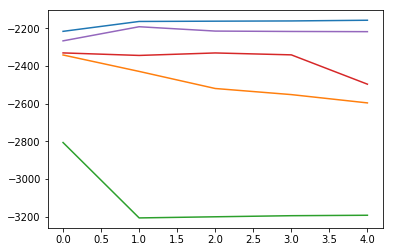

In [13]:
# #predictions_id
# NUM_ITERATIONS = 5
# pca_accuracies_id=[0]*NUM_ITERATIONS
# pca_log_iterations=np.zeros((NUM_ITERATIONS, 5))

# pca_predictions_id = [0] * len(words)*len(pca_test_word_id[0])

# for iter in range(NUM_ITERATIONS):
#     for i in range(len(words)):
#         pca_models_id[i].train(pca_data_per_word_id[i])
        
#     for j in range(len(words)*len(pca_test_word_id[0])):
#         pca_log_gs_id = [0] * len(words)
#         for i in range(len(words)):
#     #         print('jnum: '+str(j))
#     #         print('file-in: \n')
#                 #print('i: '+str(i)+'| j: '+str(j))
#             #         print(test_word_d[math.floor(j/len(test_word_d[0]))][j%len(test_word_d[0])])
#                 #print(test_word_d[i][j])
#                 pca_log_gs_id[i]=pca_models_id[i].test(pca_test_word_id[math.floor(j/len(pca_test_word_id[0]))][j%len(pca_test_word_id[0])])
#         pca_predictions_id[j]=words[np.argmax(pca_log_gs_id)]
#         pca_log_iterations[iter]=pca_log_gs_id
#     print(pca_log_iterations[iter])
#     same=0
#     for x in range(len(pca_predictions_id)):
#         print(pca_predictions_id[x],', ',pca_true_labels_id[x])
#         if pca_predictions_id[x]==pca_true_labels_id[x]:
#             same+=1
            
#     pca_accuracies_id[iter]=same/len(pca_predictions_id)
#     print('Accuracy: '+str(same/len(pca_predictions_id)))
    
# plt.plot(pca_log_iterations[:, :])

## Training GaussianHMMs (Speaker Independent)

In [23]:
pca_models_d=np.empty(len(words), dtype=np.object)
for i in range(len(words)):
    pca_models_d[i]=GHMM(pca_means_per_word_d[i], pca_cov_per_word_d[i])
    
# for i in range(len(words)):
#     pca_models_d[i].train(pca_data_per_word_d[i])

[-6950.75284168 -7888.11968203 -7761.20327644 -8150.06410932
 -6495.8628141 ]
tts ,  asr
tts ,  asr
tts ,  asr
tts ,  asr
tts ,  cnn
tts ,  cnn
tts ,  cnn
tts ,  cnn
tts ,  dnn
tts ,  dnn
tts ,  dnn
tts ,  dnn
tts ,  hmm
tts ,  hmm
tts ,  hmm
tts ,  hmm
tts ,  tts
tts ,  tts
tts ,  tts
tts ,  tts
Accuracy: 0.2
[-6621.43356474 -7328.06993214 -7742.36495071 -8419.10692452
 -6438.02862653]
asr ,  asr
asr ,  asr
tts ,  asr
tts ,  asr
asr ,  cnn
asr ,  cnn
tts ,  cnn
tts ,  cnn
asr ,  dnn
asr ,  dnn
asr ,  dnn
tts ,  dnn
asr ,  hmm
tts ,  hmm
tts ,  hmm
asr ,  hmm
asr ,  tts
tts ,  tts
asr ,  tts
tts ,  tts
Accuracy: 0.2
[-6612.18634119 -8450.42074276 -8435.79505672 -8326.23100254
 -6538.79327884]
dnn ,  asr
asr ,  asr
tts ,  asr
asr ,  asr
asr ,  cnn
asr ,  cnn
asr ,  cnn
asr ,  cnn
asr ,  dnn
asr ,  dnn
asr ,  dnn
tts ,  dnn
asr ,  hmm
tts ,  hmm
tts ,  hmm
asr ,  hmm
asr ,  tts
tts ,  tts
asr ,  tts
tts ,  tts
Accuracy: 0.2
[-6622.35602783 -8469.69234542 -8524.92199722 -8331.91623019
 -6

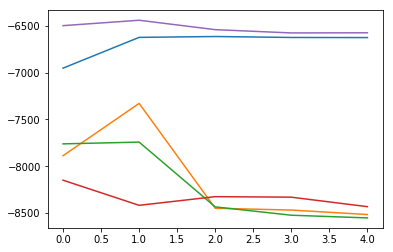

In [24]:
#predictions_d    
NUM_ITERATIONS = 5
pca_accuracies_d=[0]*NUM_ITERATIONS
pca_log_iterations=np.zeros((NUM_ITERATIONS, 5))
pca_predictions_d = [0] * len(words)*len(pca_test_word_d[0])

for iter in range(NUM_ITERATIONS):
    for i in range(len(words)):
        pca_models_d[i].train(pca_data_per_word_d[i])
        
    for j in range(len(words)*len(pca_test_word_d[0])):
        pca_log_gs_d = [0] * len(words)
        for i in range(len(words)):
    #         print('jnum: '+str(j))
    #         print('file-in: \n')
                #print('i: '+str(i)+'| j: '+str(j))
            #         print(test_word_d[math.floor(j/len(test_word_d[0]))][j%len(test_word_d[0])])
                #print(test_word_d[i][j])
                pca_log_gs_d[i]=pca_models_d[i].test(pca_test_word_d[math.floor(j/len(pca_test_word_d[0]))][j%len(pca_test_word_d[0])])
        pca_predictions_d[j]=words[np.argmax(pca_log_gs_d)]
        pca_log_iterations[iter]=pca_log_gs_d
    print(pca_log_iterations[iter])
    same=0
    for x in range(len(pca_predictions_d)):
        print(pca_predictions_d[x],', ',pca_true_labels_d[x])
        if pca_predictions_d[x]==pca_true_labels_d[x]:
            same+=1
            
    pca_accuracies_d[iter]=same/len(pca_predictions_d)
    print('Accuracy: '+str(same/len(pca_predictions_d)))
    
plt.plot(pca_log_iterations[:, :])

## Print Accuracies

In [19]:
# for i in range(NUM_ITERATIONS): #Speaker Dependendent
#     print('Accuracy for iteration ', i+1, ': ',pca_accuracies_id[i]*100, '%')

Accuracy for iteration  1 :  72.0 %
Accuracy for iteration  2 :  81.33333333333333 %
Accuracy for iteration  3 :  77.33333333333333 %
Accuracy for iteration  4 :  77.33333333333333 %
Accuracy for iteration  5 :  81.33333333333333 %


In [25]:
for i in range(NUM_ITERATIONS):  #Speaker Independendent
    print('Accuracy for iteration ', i+1, ': ',pca_accuracies_d[i]*100, '%')

Accuracy for iteration  1 :  20.0 %
Accuracy for iteration  2 :  20.0 %
Accuracy for iteration  3 :  20.0 %
Accuracy for iteration  4 :  25.0 %
Accuracy for iteration  5 :  25.0 %


## Create Confusion Matrix Here

In [17]:
# confusion_matrix(pca_true_labels_id, pca_predictions_id) #Speaker Dependendent

array([[15,  0,  0,  0,  0],
       [ 1, 12,  1,  0,  1],
       [ 0,  1,  9,  4,  1],
       [ 2,  0,  0, 13,  0],
       [ 3,  0,  0,  0, 12]])

In [26]:
confusion_matrix(pca_true_labels_d, pca_predictions_d) #Speaker Independendent

array([[3, 0, 0, 0, 1],
       [4, 0, 0, 0, 0],
       [4, 0, 0, 0, 0],
       [3, 0, 0, 0, 1],
       [2, 0, 0, 0, 2]])